<a href="https://colab.research.google.com/github/aso1901104/AI_teach2020/blob/master/AI20200303_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手書き文字を認識させる

### 手書き文字のデータセット(sklearn付属)を読み込み

In [62]:
# sklearn付属のデータセットを読み込む
from sklearn import datasets

In [63]:
# openCVとplotのライブラリを読み込む
import cv2
import matplotlib.pyplot as plt

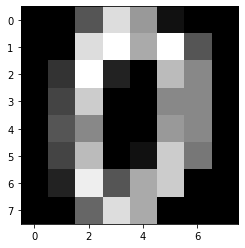

<class 'numpy.ndarray'>


In [64]:
# ライブラリのデータをプログラムに読み込む
digits = datasets.load_digits() # 10進数整数用の文字データ
type(digits)
# 1つめを表示してみる
plt.imshow(digits.images[0], cmap="gray")
plt.show()
# データ型を確認
print(type(digits.images))

### データセットの説明書きを表示

In [65]:
# データセットの詳細説明(describe)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### データセットの各画像情報(ピクセル)を画像として表示

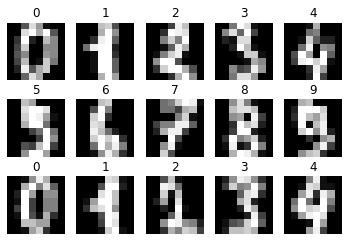

In [66]:
for i in range(15): # 0から15未満まで
  plt.subplot(3, 5, i+1) # 3行5列ひとつずつ表示
  plt.axis('off') # 軸は表示しない
  # targetという配列に対応する数値があるので件名として表示
  plt.title(str(digits.target[i]))
  # 画像データをグレースケールで表示
  plt.imshow(digits.images[i], cmap="gray")
plt.show()

### digitsのimagesに画像情報が、targetに正解の数値(ラベル)が入っている

<class 'numpy.ndarray'>
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 

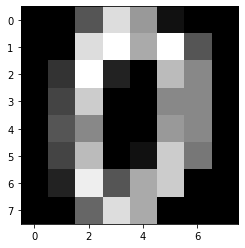

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [67]:
# digits.imagesの様子を表示して確認してみる
# numpy配列
print(type(digits.images))
# 中身
print(digits.images)
# 1つめだけ取り出す
d0 = digits.images[0]
# 画面に表示してみる(画像として)
plt.imshow(d0, cmap="gray")
plt.show()
# 画像情報を表示
print(d0)

### データセットの文字情報の配列を整形して1文字ずつの2次元配列に整形(1文字=1行64ピクセル)

In [68]:
d = digits.images
# 人にの行数で、1行64列を指定して配列(行列)を整形
d = d.reshape(-1, 64)
print("1行の長さ(ピクセル数)：", len(d[0]))
# 全体(2次元配列)の行数
print("全体 (2次元配列)の行数：", len(d))
# 1行目の文字情報を出力
print(d[0])

1行の長さ(ピクセル数)： 64
全体 (2次元配列)の行数： 1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### データセットを使ってまず学習済みモデルを作る(アルゴリズムはsvm)

In [69]:
# ライブラリのimport
# 学習用データとテスト検証用データを分けるライブラリ
from sklearn.model_selection import train_test_split
# データセットとsvmとmetricsをカンマ区切りで一度にimport
from sklearn import datasets, svm, metrics
# 精度検証用
from sklearn.metrics import accuracy_score

### データを読み込む(一度やっているのでしなくてもOK)

In [70]:
# dict型になっている{images:value, target:value}(連想配列に似ている)
digits = datasets.load_digits()
# 説明変数として格納
x = digits.images
# 目的変数として格納
y = digits.target
# 構成を確認
print("xの構成", x.shape)
print('yの構成', y.shape)

# xの3次元配列を任意行の64列の2次元配列に変換(1行1文字データにする)
x = x.reshape(-1, 64)

# データを学習用とテスト検証用に分割する
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# バックスラッシュで継続改行(改行じゃなくて続きの行だという意味)
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.25)

# SVCの学習モデルを生成
clf = svm.SVC()
# 学習データを学習する
clf.fit(x_train, y_train)

# 学習済みになったので、テスト検証用データでテスト検証して予測精度を確認する
y_pred = clf.predict(x_test) # テスト検証
# 精度表示
print(accuracy_score(y_test, y_pred))

xの構成 (1797, 8, 8)
yの構成 (1797,)
0.9822222222222222


### 学習済みモデルをバイナリファイルとして保存

In [71]:
# 保存用ライブラリ
import pickle
# バイナリ書き込みモード(wb)でファイルポインタ(fp)をオープン
with open("digits.pkl", "wb") as fp: # "digits.pkl"は好きなファイル名でよい
   pickle.dump(clf, fp) # ピクル(塩漬け)ファイrへ投げ込む(dump)

### テスト用手書きデータをダウンロード

In [72]:
# ライブラリをimport
import urllib.request as req
# url文字列
url_2 = "https://raw.githubusercontent.com/masatokg/sample_photo/master/my2.png"
url_4 = "https://raw.githubusercontent.com/masatokg/sample_photo/master/my4.png"
url_9 = "https://raw.githubusercontent.com/masatokg/sample_photo/master/my9.png"
url_kuga8 = "https://raw.githubusercontent.com/masatokg/sample_photo/master/kuga8.png"
url_kuga88 = "https://raw.githubusercontent.com/masatokg/sample_photo/master/kuga88.png"

# ダウンロードして保存
req.urlretrieve(url_2, "my2.png")
req.urlretrieve(url_4, "my4.png")
req.urlretrieve(url_9, "my9.png")
req.urlretrieve(url_kuga8, "kuga8.png")
req.urlretrieve(url_kuga88, "kuga88.png")

('kuga88.png', <http.client.HTTPMessage at 0x7ff424908748>)

### 手書き文字のファイルを判定する関数を定義

In [73]:
def predict_digit(filename):
  # 学習済みモデルのファイルを読み込む(バイナリ読み込みモード:rb, fpはファイルポインタ)
  with open('digits.pkl', "rb") as fp:
    # ピクセルから読み込む
    clf = pickle.load(fp)
  # 引き渡されたファイル名のファイルをプロgラムに読み込む
  my_img = cv2.imread(filename)

  # 読み込んだ画像を白黒化
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  # 読み込んだ画像を表示
  plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
  plt.show()

  # 画像データを学習データと比較するために同じ8*8サイズにする
  my_img = cv2.resize(my_img, (8,8)) # 8,8のタプルでサイズを指定
  print("縮小した画像を表示")
  plt.imshow( cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
  plt.show()

  # 色調変換, 元画像は256(0~255)段階なので、17(0~16)段階に変換する
  max_val = 16 # 色調最大値
  divisions = max_val + 1 # 色調段階数
  print("文字画像の元の色情報を表示", my_img)
  # 色情報を0~16段階にする
  my_img = my_img // divisions
  print(divisions, "段階にしたimg情報", my_img)
  # MAX値からの距離で色情報を反転させる(学習したデータセットが黒字に白色)
  my_img = (max_val - my_img)
  print("白黒値を反転させたimg情報", my_img)

  # 判定のため、2次元配列(-1, 64)の形に変換する
  my_img = my_img.reshape(-1, 64)
  # 判定する
  res = clf.predict(my_img)
  # 推論結果resは引数の分だけの配列
  # 今回引数は1文字だけなので戦闘要素が推論結果
  print("resの中身 ", res)
  return res[0] # 先頭を返す

### 自作関数predict_digitを呼び出して実行してみる

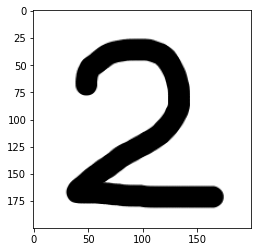

縮小した画像を表示


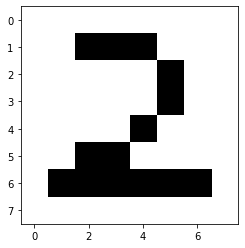

文字画像の元の色情報を表示 [[255 255 255 255 255 255 255 255]
 [255 255   0   0   0 255 255 255]
 [255 255 255 255 255   0 255 255]
 [255 255 255 255 255   0 255 255]
 [255 255 255 255   0 255 255 255]
 [255 255   0   0 255 255 255 255]
 [255   0   0   0   0   0   0 255]
 [255 255 255 255 255 255 255 255]]
17 段階にしたimg情報 [[15 15 15 15 15 15 15 15]
 [15 15  0  0  0 15 15 15]
 [15 15 15 15 15  0 15 15]
 [15 15 15 15 15  0 15 15]
 [15 15 15 15  0 15 15 15]
 [15 15  0  0 15 15 15 15]
 [15  0  0  0  0  0  0 15]
 [15 15 15 15 15 15 15 15]]
白黒値を反転させたimg情報 [[ 1  1  1  1  1  1  1  1]
 [ 1  1 16 16 16  1  1  1]
 [ 1  1  1  1  1 16  1  1]
 [ 1  1  1  1  1 16  1  1]
 [ 1  1  1  1 16  1  1  1]
 [ 1  1 16 16  1  1  1  1]
 [ 1 16 16 16 16 16 16  1]
 [ 1  1  1  1  1  1  1  1]]
resの中身  [2]
推論結果：my2.png =  2


In [74]:
n = predict_digit("my2.png") # 保存したファイル名を引き渡す
print("推論結果：my2.png = ", str(n))

### 他の画像もどんどん判定する


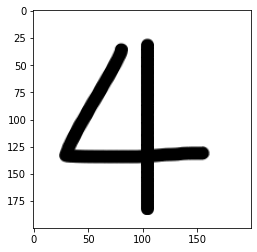

縮小した画像を表示


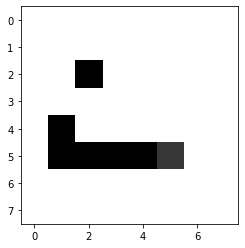

文字画像の元の色情報を表示 [[255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255   0 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255   0 255 255 255 255 255 255]
 [255   0   0   0   0  54 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
17 段階にしたimg情報 [[15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15  0 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15  0 15 15 15 15 15 15]
 [15  0  0  0  0  3 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]]
白黒値を反転させたimg情報 [[ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1 16  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1 16  1  1  1  1  1  1]
 [ 1 16 16 16 16 13  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]]
resの中身  [4]
推論結果：my4.png =  4


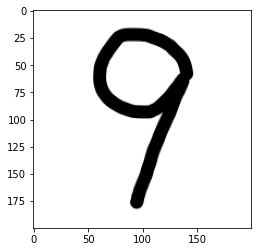

縮小した画像を表示


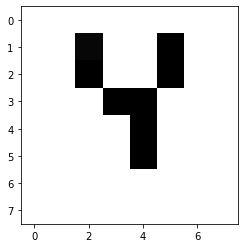

文字画像の元の色情報を表示 [[255 255 255 255 255 255 255 255]
 [255 255   7 255 255   0 255 255]
 [255 255   0 255 255   0 255 255]
 [255 255 255   0   0 255 255 255]
 [255 255 255 255   0 255 255 255]
 [255 255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
17 段階にしたimg情報 [[15 15 15 15 15 15 15 15]
 [15 15  0 15 15  0 15 15]
 [15 15  0 15 15  0 15 15]
 [15 15 15  0  0 15 15 15]
 [15 15 15 15  0 15 15 15]
 [15 15 15 15  0 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]]
白黒値を反転させたimg情報 [[ 1  1  1  1  1  1  1  1]
 [ 1  1 16  1  1 16  1  1]
 [ 1  1 16  1  1 16  1  1]
 [ 1  1  1 16 16  1  1  1]
 [ 1  1  1  1 16  1  1  1]
 [ 1  1  1  1 16  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]]
resの中身  [9]
推論結果：my9.png =  9


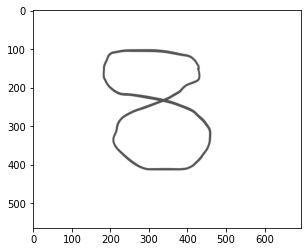

縮小した画像を表示


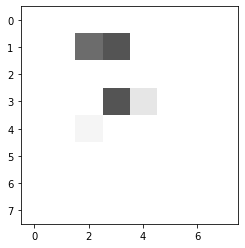

文字画像の元の色情報を表示 [[255 255 255 255 255 255 255 255]
 [255 255 108  84 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255  84 230 255 255 255]
 [255 255 245 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
17 段階にしたimg情報 [[15 15 15 15 15 15 15 15]
 [15 15  6  4 15 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15  4 13 15 15 15]
 [15 15 14 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]]
白黒値を反転させたimg情報 [[ 1  1  1  1  1  1  1  1]
 [ 1  1 10 12  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1 12  3  1  1  1]
 [ 1  1  2  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]]
resの中身  [4]
推論結果：kuga8.png =  4


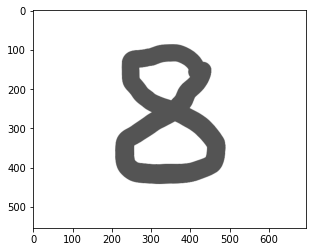

縮小した画像を表示


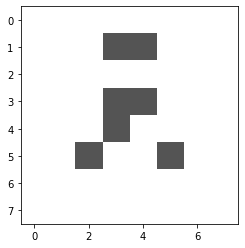

文字画像の元の色情報を表示 [[255 255 255 255 255 255 255 255]
 [255 255 255  84  84 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255  84  84 255 255 255]
 [255 255 255  84 255 255 255 255]
 [255 255  84 255 255  84 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]
17 段階にしたimg情報 [[15 15 15 15 15 15 15 15]
 [15 15 15  4  4 15 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15  4  4 15 15 15]
 [15 15 15  4 15 15 15 15]
 [15 15  4 15 15  4 15 15]
 [15 15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15]]
白黒値を反転させたimg情報 [[ 1  1  1  1  1  1  1  1]
 [ 1  1  1 12 12  1  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1 12 12  1  1  1]
 [ 1  1  1 12  1  1  1  1]
 [ 1  1 12  1  1 12  1  1]
 [ 1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1]]
resの中身  [8]
推論結果：kuga88.png =  8


In [75]:
n = predict_digit("my4.png")
print("推論結果：my4.png = ", str(n))
n = predict_digit("my9.png")
print("推論結果：my9.png = ", str(n))
# 久家の手書き
n = predict_digit("kuga8.png")
print("推論結果：kuga8.png = ", str(n))
n = predict_digit("kuga88.png")
print("推論結果：kuga88.png = ", str(n))